### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [3]:
# 1. Завантаження даних
import pandas as pd
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('marketing_campaign.csv', sep='\t')

Saving marketing_campaign.csv to marketing_campaign.csv


In [5]:
# 2. Обробка пропущених значень
df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Стандартизація даних:**
   Використайте метод `StandardScaler` для стандартизації значень обраних характеристик.
   
   **Чому не MinMaxScaler:**
   - Для PCA краще використовувати StandardScaler, бо він вирівнює дисперсію ознак, на відміну від MinMaxScaler, що просто масштабує значення без врахування варіації.

   - Для K-Means також краще використовувати StandardScaler, бо алгоритм чутливий до масштабів: фічі з більшими значеннями сильніше впливають на обчислення відстаней, що може спотворити кластери.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

# Select key features for clustering
features = [
    'Income',
    'Recency',
    'NumStorePurchases',
    'NumDealsPurchases',
    'days_lifetime',
    'years_customer',
    'NumWebVisitsMonth'
]
X_sel = X[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Reduce dimensionality to 3 components using PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Visualize the results in 3D using plotly express
fig = px.scatter_3d(
    x=X_pca[:,0],
    y=X_pca[:,1],
    z=X_pca[:,2],
    color=clusters.astype(str),
    title="Customers in the space of the first three principal components",
    labels={'x':'PC1', 'y':'PC2', 'z':'PC3'}
)
fig.show()

**Спостереження:**

На графіку бачимо 3 основні групи, кордони між кластерами трішки "зліплені", не завжди чіткі.

Один кластер (синьо-фіолетовий) більш відокремлений, що може означати наявність специфічного сегмента клієнтів із відмінними ознаками, бачимо викиди.

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [7]:
# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2, PC3):", explained_variance)

# Cumulative explained variance for the first three components
cumulative_explained_variance = explained_variance.cumsum()
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratio (PC1, PC2, PC3): [0.31847333 0.19659128 0.1433869 ]
Cumulative explained variance: [0.31847333 0.51506461 0.6584515 ]


**Спостереження:**

Близько 32% загальної варіації даних пояснюється першою головною компонентою.
Дві наступні компоненти відповідають ще за 20% і 14%.
Сукупно це дозволяє зберегти близько 66% інформації, закладеної в початкових змінних.
Хоча решта варіації залишається поза межами проєкції, тривимірне представлення все одно адекватно відображає структуру простору ознак та основні кластери.

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

In [11]:
# Get the feature names from the original DataFrame used for PCA
feature_names = X_sel.columns

# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(
    data=pca.components_.T,  # Transpose to have features as rows
    columns=['PC1', 'PC2', 'PC3'],
    index=feature_names
)

# Display the loadings DataFrame
print(loadings_df)

                        PC1       PC2       PC3
Income             0.584238  0.165255 -0.044491
Recency            0.010075  0.036810  0.975799
NumStorePurchases  0.488621  0.384659 -0.080566
NumDealsPurchases -0.198661  0.608119 -0.034808
days_lifetime     -0.132683  0.602585 -0.022223
years_customer     0.189393  0.208946  0.193368
NumWebVisitsMonth -0.571728  0.216329 -0.015815


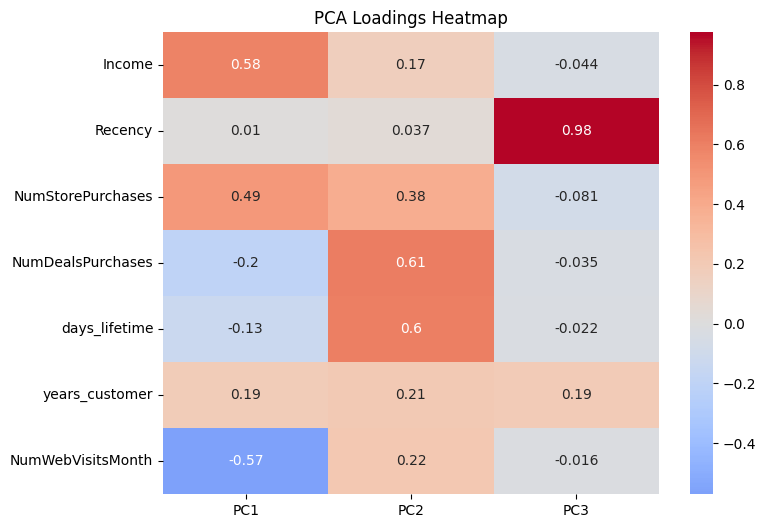

In [13]:
# Heatmap loadings
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of PCA loadings
plt.figure(figsize=(8,6))
sns.heatmap(
    loadings_df,
    annot=True,
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.title("PCA Loadings Heatmap")
plt.show()

Спостереження:

* На PC1 впливають найбільше ознаки Income.
* На PC2 впливають найбільше ознаки NumDealsPurchases.
* На PC3 впливають найбільше ознаки Recency.

###Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

features_no_income = [
    'Recency',
    'NumStorePurchases',
    'NumDealsPurchases',
    'days_lifetime',
    'years_customer',
    'NumWebVisitsMonth'
]
X_no_income = X[features_no_income]


# Re-scale the data without 'Income'
scaler = MinMaxScaler()
X_scaled_no_income = scaler.fit_transform(X_no_income)

# Re-run PCA with 3 components
pca_no_income = PCA(n_components=3)
pca_no_income.fit(X_scaled_no_income)

PCA(n_components=3)

In [21]:
# Get the feature names from the original DataFrame
feature_names_no_income = X_no_income.columns

# Create a DataFrame with the new loadings
loadings_df_no_income = pd.DataFrame(
    data=pca_no_income.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=feature_names_no_income
)

# Display the new loadings DataFrame
print(loadings_df_no_income)

                        PC1       PC2       PC3
Recency            0.500712  0.865392  0.008648
NumStorePurchases  0.226953 -0.145537  0.924549
NumDealsPurchases  0.105012 -0.065833 -0.027582
days_lifetime      0.825793 -0.472036 -0.232275
years_customer     0.007110  0.005913  0.079808
NumWebVisitsMonth  0.069051 -0.052233 -0.289919


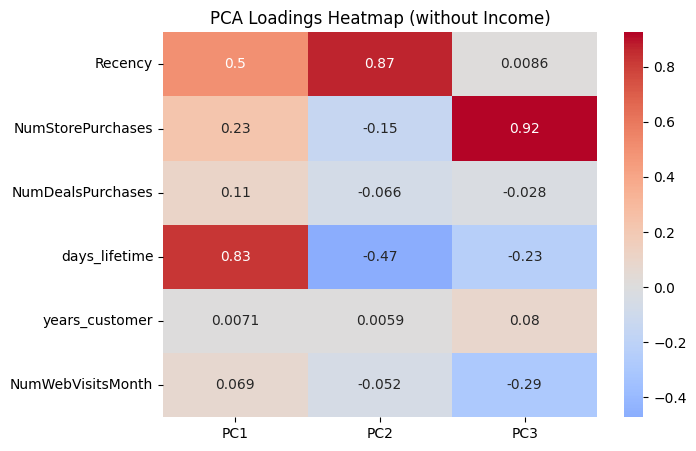

In [22]:
# Heatmap of PCA loadings without Income
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(
    loadings_df_no_income,
    annot=True,
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.title("PCA Loadings Heatmap (without Income)")
plt.show()

In [23]:
# Get the explained variance ratio for each component
explained_variance_ratio_no_income = pca_no_income.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio_no_income)

# Calculate and print the cumulative explained variance
cumulative_variance_no_income = explained_variance_ratio_no_income.cumsum()
print("Cumulative Explained Variance:", cumulative_variance_no_income)

Explained Variance Ratio: [0.32149032 0.30545488 0.23446936]
Cumulative Explained Variance: [0.32149032 0.6269452  0.86141456]


**Спостереження:**


* PC1 пояснює 32% варіації.
* PC2 пояснює 30% варіації.
* PC3 пояснює 23% варіації.
* Лише PC1 пояснює 32% варіації.
* Разом PC1 і PC2 пояснюють 63% варіації.
* PC1, PC2 і PC3 разом пояснюють 86% варіації.


### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [25]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0, init='pca', learning_rate='auto')
tsne_data = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE coordinates and cluster labels
tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = clusters.astype(str) # Use 'clusters' instead of 'cluster_labels'

# Add the original data for hover_data
tsne_df = pd.concat([tsne_df, X_sel], axis=1)  # Add original features, use X_sel which was used for clustering

# Create an interactive 2D scatter plot
fig = px.scatter(
    tsne_df,
    x='t-SNE 1',
    y='t-SNE 2',
    color='Cluster',
    hover_data=X_sel.columns.tolist(), # Add original feature values to hover data
    title='t-SNE Visualization of Customer Clusters'
)
fig.show()

# Analyze clusters based on feature characteristics
cluster_means = X_sel.groupby(clusters).mean() # Use 'clusters' for grouping
print(cluster_means)

         Income    Recency  NumStorePurchases  NumDealsPurchases  \
0  33054.878252  48.472425           3.174818           1.811655   
1  72551.554070  49.345079           8.341434           1.442284   
2  51950.663736  50.085714           6.705495           5.002198   

   days_lifetime  years_customer  NumWebVisitsMonth  
0     312.554631       41.914672           6.506764  
1     315.252734       47.347509           3.066829  
2     509.481319       48.243956           6.870330  


**Спостереження:**

Кластери візуально добре розділені на t-SNE-проєкції.
Алгоритм t-SNE ефективно відобразив нелінійні зв’язки між об’єктами та дозволив чітко побачити три основні групи клієнтів.

На відміну від PCA, який передає глобальну структуру, t-SNE краще демонструє локальні взаємозв’язки між подібними клієнтами.

Відмінності між кластерами за основними показниками:
* Клієнти кластеру 1 (зелений) мають вищий дохід (Income) і частіше здійснюють покупки як у магазинах, так і онлайн.
* Кластер 0 (червоний) характеризується нижчим доходом, меншою кількістю покупок і дещо меншою активністю на вебсайті.
* Кластер 2 (синій) займає проміжне положення, але має вищий показник Recency, тобто ці клієнти здійснювали покупки давніше — це може свідчити про потенційне «відтікання» клієнтів.

Подібність між кластерами 0 і 2.

За більшістю характеристик вони близькі, окрім Recency, що може вказувати на недостатню якість кластеризації або потребу у використанні додаткових ознак.

Продуктивність t-SNE.
Обчислення виконувалися повільніше, ніж PCA, що є типовим для цього методу. Проте t-SNE забезпечує кращу візуалізацію локальної структури даних, що особливо корисно для дослідження схожості клієнтів.
